In [305]:
# Importn necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [306]:
# load all datasets
dialogue_df = pd.read_csv('./Harry_Potter_Movies/Dialogue.csv',encoding = "ISO-8859-1")
characters_df = pd.read_csv('./Harry_Potter_Movies/Characters.csv',encoding = "ISO-8859-1")
movies_df = pd.read_csv('./Harry_Potter_Movies/Movies.csv')
chapters_df = pd.read_csv('./Harry_Potter_Movies/Chapters.csv', encoding = "ISO-8859-1")
places_df = pd.read_csv('./Harry_Potter_Movies/Places.csv')
datasets_list = [dialogue_df,characters_df,movies_df,chapters_df, places_df]

In [307]:
# understand structure of these datasets

for df in datasets_list:
    
    df.info()
    print()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dialogue ID   7444 non-null   int64 
 1   Chapter ID    7444 non-null   int64 
 2   Place ID      7444 non-null   int64 
 3   Character ID  7444 non-null   int64 
 4   Dialogue      7444 non-null   object
dtypes: int64(4), object(1)
memory usage: 290.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null     object
 6   Wand (Wood)     21 non-null     object
 7   Wand (Core)     18 non-null     object
dt

### Dialogue.csv
- contains all dialogues and identifiers in this dataset, 7444 records
- dialgous are Dtype object, and all identifiers that we will use to join with other tables are integer types
- no missing rows / cleaning required

### Characters.csv
- we see that there are 166 records in which they all have an ID and a name, but about 41 of them are not assigned a gender or species
- 90 characters are not assigned a house. Other fields in this dataset like Patronus and Wand(s) are nullable for most characters

### Movies.csv
- This small dataframe stores the 8 movies in the Harry Potter series
- no cleaning required, may do additional augmenting to the dataset

### Chapters.csv
- 234 records, no missing values
- contains identifiers to join back on dataframes coming frmo Dialgoue.csv and Movies.csv

### Places.csv
- all places/locations are non-null, no cleaning will be required

In [308]:
"""
Get a feel for what the data looks like
"""

#dialogue_df.head(20)
#characters_df.head(20)
#movies_df.head(20)
#chapters_df.head(20)
#places_df.head(20)

'\nGet a feel for what the data looks like\n'

- Now that we have identified the unique identifiers from each of these datasets, we can use Pandas to join/merge this data to create a holistic dataset

In [309]:
join1 = dialogue_df.merge(chapters_df, on = 'Chapter ID')
join1

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Chapter Name,Movie ID,Movie Chapter
0,1,1,8,4,I should have known that you would be here...P...,Doorstep Delivery,1,1
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Doorstep Delivery,1,1
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Doorstep Delivery,1,1
3,4,1,8,7,And the boy?,Doorstep Delivery,1,1
4,5,1,8,4,Hagrid is bringing him.,Doorstep Delivery,1,1
...,...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,Nineteen Years Later,8,26
7440,7441,234,71,84,Really?,Nineteen Years Later,8,26
7441,7442,234,71,1,Really.,Nineteen Years Later,8,26
7442,7443,234,71,1,Ready?,Nineteen Years Later,8,26


In [310]:
join2 = join1.merge(movies_df, on = 'Movie ID')
join2

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Chapter Name,Movie ID,Movie Chapter,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,1,8,4,I should have known that you would be here...P...,Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
3,4,1,8,7,And the boy?,Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
4,5,1,8,4,Hagrid is bringing him.,Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"
7440,7441,234,71,84,Really?,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"
7441,7442,234,71,1,Really.,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"
7442,7443,234,71,1,Ready?,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"


In [311]:
characters_df_columns = ['Character ID', 'Character Name', 'Gender', 'House'] # taking subset of characters_df
join3 = join2.merge(characters_df[characters_df_columns], on = 'Character ID')
join3

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Chapter Name,Movie ID,Movie Chapter,Movie Title,Release Year,Runtime,Budget,Box Office,Character Name,Gender,House
0,1,1,8,4,I should have known that you would be here...P...,Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",Albus Dumbledore,Male,Gryffindor
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",Minerva McGonagall,Female,Gryffindor
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",Albus Dumbledore,Male,Gryffindor
3,4,1,8,7,And the boy?,Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",Minerva McGonagall,Female,Gryffindor
4,5,1,8,4,Hagrid is bringing him.,Doorstep Delivery,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",Albus Dumbledore,Male,Gryffindor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000",Harry Potter,Male,Gryffindor
7440,7441,234,71,84,Really?,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000",Albus Potter,Male,Slytherin
7441,7442,234,71,1,Really.,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000",Harry Potter,Male,Gryffindor
7442,7443,234,71,1,Ready?,Nineteen Years Later,8,26,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000",Harry Potter,Male,Gryffindor


In [312]:
join4 = join3.merge(places_df, on = 'Place ID')
join4

df = join4.copy()

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dialogue ID     7444 non-null   int64 
 1   Chapter ID      7444 non-null   int64 
 2   Place ID        7444 non-null   int64 
 3   Character ID    7444 non-null   int64 
 4   Dialogue        7444 non-null   object
 5   Chapter Name    7444 non-null   object
 6   Movie ID        7444 non-null   int64 
 7   Movie Chapter   7444 non-null   int64 
 8   Movie Title     7444 non-null   object
 9   Release Year    7444 non-null   int64 
 10  Runtime         7444 non-null   int64 
 11  Budget          7444 non-null   object
 12  Box Office      7444 non-null   object
 13  Character Name  7444 non-null   object
 14  Gender          7280 non-null   object
 15  House           6527 non-null   object
 16  Place Name      7444 non-null   object
 17  Place Category  7444 non-null   object
dtypes: int64

In [314]:
print(len(df[df['Gender'].isnull()]))


164


### Data Transformation
- now that I have created an encommpasing dataset, we can dig a little deeper and see what needs to be changed

In [315]:
# change the order/sequence of our columns for viewability
cols = ['Dialogue ID','Chapter ID', 'Place ID', 'Character ID', 'Movie ID', 'Movie Title', 'Release Year', 'Runtime',
        'Budget', 'Box Office', 'Movie Chapter', 'Chapter Name', 'Dialogue', 'Character Name', 'Gender', 'House', 
        'Place Name', 'Place Category']

df = df[cols]
df.head(2)

,Dialogue ID,Chapter ID,Place ID,Character ID,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Movie Chapter,Chapter Name,Dialogue,Character Name,Gender,House,Place Name,Place Category
0,1,1,8,4,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",1,Doorstep Delivery,I should have known that you would be here...P...,Albus Dumbledore,Male,Gryffindor,4 Privet Drive,Dwellings
1,2,1,8,7,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000",1,Doorstep Delivery,"Good evening, Professor Dumbledore. Are the ru...",Minerva McGonagall,Female,Gryffindor,4 Privet Drive,Dwellings


In [316]:
# analyze the rows with missing values are for House
missing_house_rows = df[df['House'].isnull()]
missing_house_rows.head(5)
# impute values for House
df.fillna({"House":"No House Assigned"}, inplace = True) 


In [317]:
# analyze the rows with missing values for Gender
missing_gender_rows = df[df['Gender'].isnull()]
print("Number of missing rows for the Gender column", len(missing_gender_rows))
#missing_gender_rows.head(15)
#missing_gender_rows['Character Name'].values

# select the 'Character Names' for Male and Females
males = ['Man', 'Man ', 'Boy', 'Old man', 'Old man ', 'Boy 2', 'Gang thug', 'Man in painting']
females = ['Woman', 'Girl', 'Waitress', 'The Fat Lady', 'Witch']

gender_mapping = {
    'Man': 'Male', 'Man ': 'Male', 'Boy': 'Male', 'Old man': 'Male', 'Old man ': 'Male',
    'Boy 2': 'Male', 'Gang thug': 'Male', 'Man in painting': 'Male',
    'Woman': 'Female', 'Girl': 'Female', 'Waitress': 'Female', 'The Fat Lady': 'Female', 'Witch': 'Female'
}

df.loc[df['Gender'].isnull(), 'Gender'] = df.loc[df['Gender'].isnull(), 'Character Name'].map(gender_mapping)
df.fillna({"Gender":"Not Defined"}, inplace = True) 


missing_gender_rows = df[df['Gender'].isnull()]
print("Number of missing rows for the Gender column (after imputing):", len(missing_gender_rows))


Number of missing rows for the Gender column 164
Number of missing rows for the Gender column (after imputing): 0


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dialogue ID     7444 non-null   int64 
 1   Chapter ID      7444 non-null   int64 
 2   Place ID        7444 non-null   int64 
 3   Character ID    7444 non-null   int64 
 4   Movie ID        7444 non-null   int64 
 5   Movie Title     7444 non-null   object
 6   Release Year    7444 non-null   int64 
 7   Runtime         7444 non-null   int64 
 8   Budget          7444 non-null   object
 9   Box Office      7444 non-null   object
 10  Movie Chapter   7444 non-null   int64 
 11  Chapter Name    7444 non-null   object
 12  Dialogue        7444 non-null   object
 13  Character Name  7444 non-null   object
 14  Gender          7444 non-null   object
 15  House           7444 non-null   object
 16  Place Name      7444 non-null   object
 17  Place Category  7444 non-null   object
dtypes: int64

### ANALYSIS 1: Average Dialogue Counts and Other Stats

In [319]:
counts_per_movie = df.groupby('Movie Title')['Dialogue ID'].count().reset_index(name = 'Dialogue Count')
print(counts_per_movie)

avg_per_movie = counts_per_movie['Dialogue Count'].mean()
print("Average dialogues per movie: ", avg_per_movie)

max_dialogues = counts_per_movie.max()
print(max_dialogues)

min_dialogues = counts_per_movie.min()
print(min_dialogues)



                                   Movie Title  Dialogue Count
0      Harry Potter and the Chamber of Secrets             986
1  Harry Potter and the Deathly Hallows Part 1            1012
2  Harry Potter and the Deathly Hallows Part 2             712
3          Harry Potter and the Goblet of Fire             741
4       Harry Potter and the Half-Blood Prince            1070
5    Harry Potter and the Order of the Phoenix            1157
6     Harry Potter and the Philosopher's Stone             885
7     Harry Potter and the Prisoner of Azkaban             881
Average dialogues per movie:  930.5
Movie Title       Harry Potter and the Prisoner of Azkaban
Dialogue Count                                        1157
dtype: object
Movie Title       Harry Potter and the Chamber of Secrets
Dialogue Count                                        712
dtype: object


### ANALYSIS 2: Top 3 characters from each movie with the most number of dialogues

In [320]:
top_characters_per_movie = df.groupby(['Movie Title', 'Character Name'])['Dialogue ID'].count().reset_index(name='Dialogue Count')
top_characters_per_movie['Rank'] = top_characters_per_movie.groupby('Movie Title')['Dialogue Count'].rank(method='max', ascending=False)
top_3_characters_per_movie = top_characters_per_movie[top_characters_per_movie['Rank'] <= 3].sort_values(['Movie Title', 'Rank'])

print("Top 3 characters from each movie with the most number of dialogues:")
top_3_characters_per_movie

Top 3 characters from each movie with the most number of dialogues:


,Movie Title,Character Name,Dialogue Count,Rank
18,Harry Potter and the Chamber of Secrets,Harry Potter,268,1.0
36,Harry Potter and the Chamber of Secrets,Ron Weasley,146,2.0
19,Harry Potter and the Chamber of Secrets,Hermione Granger,70,3.0
75,Harry Potter and the Deathly Hallows Part 1,Harry Potter,282,1.0
76,Harry Potter and the Deathly Hallows Part 1,Hermione Granger,221,2.0
98,Harry Potter and the Deathly Hallows Part 1,Ron Weasley,167,3.0
130,Harry Potter and the Deathly Hallows Part 2,Harry Potter,186,1.0
151,Harry Potter and the Deathly Hallows Part 2,Ron Weasley,79,2.0
132,Harry Potter and the Deathly Hallows Part 2,Hermione Granger,64,3.0
176,Harry Potter and the Goblet of Fire,Harry Potter,161,1.0


### ANALYSIS 3: All records in which a Dialogue contains "expecto patronum"

In [321]:
dialogues_with_expecto_patronum = df[df['Dialogue'].str.contains("expecto patronum", case=False)]
dialogues_with_expecto_patronum = dialogues_with_expecto_patronum[['Dialogue ID', 'Movie Title', 'Character Name', 'Dialogue', 'House', 'Place Name']]

print("All records in which a Dialogue contains 'expecto patronum':")
dialogues_with_expecto_patronum

All records in which a Dialogue contains 'expecto patronum':


,Dialogue ID,Movie Title,Character Name,Dialogue,House,Place Name
2336,2337,Harry Potter and the Prisoner of Azkaban,Remus Lupin,Can you do this? Yes. Very well. Close your ey...,Gryffindor,Defense Against the Dark Arts Classroom
2337,2338,Harry Potter and the Prisoner of Azkaban,Harry Potter,Expecto Patronum.,Gryffindor,Defense Against the Dark Arts Classroom
2339,2340,Harry Potter and the Prisoner of Azkaban,Harry Potter,Expecto Patronum! Expecto... Expecto... Expect...,Gryffindor,Defense Against the Dark Arts Classroom
2347,2348,Harry Potter and the Prisoner of Azkaban,Harry Potter,Just do it. Expecto Patronum! Expecto Patronum!,Gryffindor,Defense Against the Dark Arts Classroom
2590,2591,Harry Potter and the Prisoner of Azkaban,Harry Potter,Sirius! No. Sirius! Expecto Patronum!,Gryffindor,Great Lake
2709,2710,Harry Potter and the Prisoner of Azkaban,Harry Potter,Expecto Patronum!,Gryffindor,Great Lake
3517,3518,Harry Potter and the Order of the Phoenix,Harry Potter,"""Expecto Patronum!'",Gryffindor,Little Whinging
3520,3521,Harry Potter and the Order of the Phoenix,Harry Potter,"""Expecto Patronum! '",Gryffindor,Little Whinging
3572,3573,Harry Potter and the Order of the Phoenix,Remus Lupin,"""Expecto Patronum!'",Gryffindor,4 Privet Drive
6197,6198,Harry Potter and the Deathly Hallows Part 1,Harry Potter,Expecto PATRONUM!,Gryffindor,Ministry of Magic


In [323]:
dialogues_per_chapter = df.groupby(['Movie Title', 'Chapter Name'])['Dialogue ID'].count().reset_index(name='Dialogue Count')

# Display the result
print("Number of dialogues in each chapter of each movie:")
dialogues_per_chapter

Number of dialogues in each chapter of each movie:


,Movie Title,Chapter Name,Dialogue Count
0,Harry Potter and the Chamber of Secrets,A Parselmouth,23
1,Harry Potter and the Chamber of Secrets,About the Chamber,23
2,Harry Potter and the Chamber of Secrets,Aragog,24
3,Harry Potter and the Chamber of Secrets,Backfire,20
4,Harry Potter and the Chamber of Secrets,Car Rescue,27
...,...,...,...
229,Harry Potter and the Prisoner of Azkaban,Two Places at Once,5
230,Harry Potter and the Prisoner of Azkaban,Under Covers Prologue,1
231,Harry Potter and the Prisoner of Azkaban,Welcome and Warning,19
232,Harry Potter and the Prisoner of Azkaban,Who's There?,17


AttributeError: 'Figure' object has no attribute 'title'

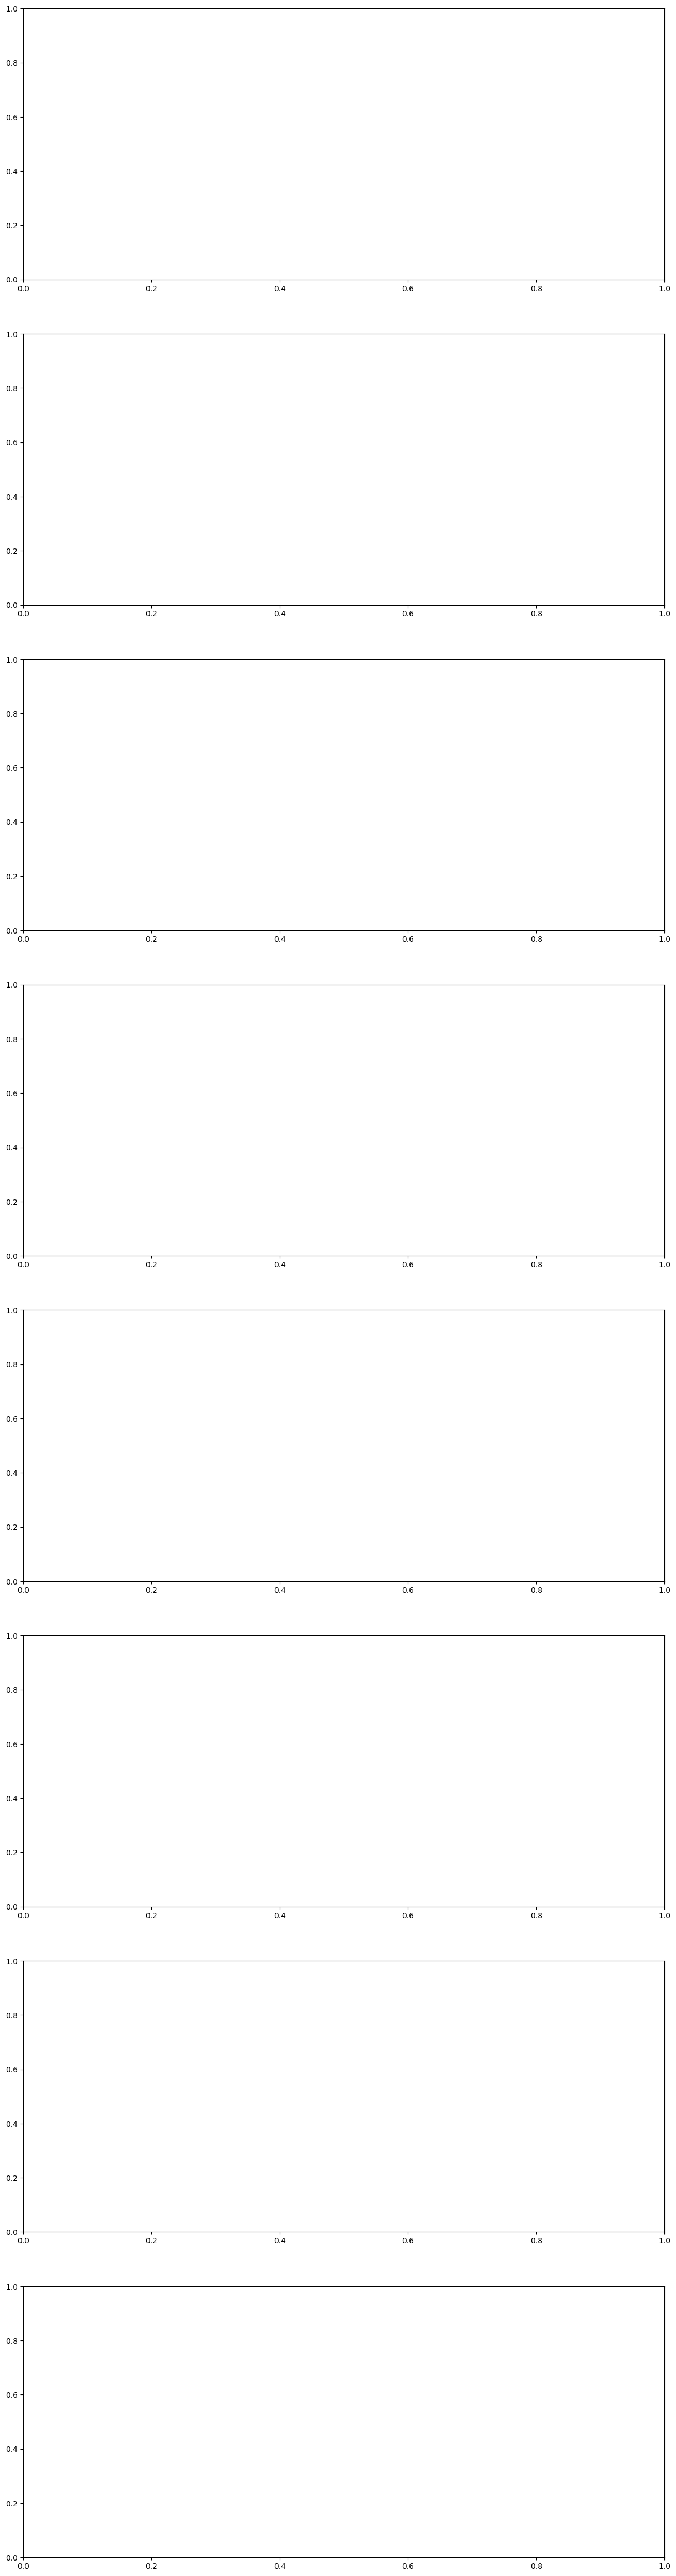

In [352]:
import matplotlib.pyplot as plt

# Group the data by 'Movie Title' and 'Gender' and count the number of dialogues
dialogues_by_gender = df.groupby(['Movie Title', 'Gender'])['Dialogue ID'].count().unstack()

# Create subplots for each movie
num_movies = len(df['Movie Title'].unique())

fig, axes = plt.subplots(8, 1, figsize=(15, 60))
plt.title('Distribution of Dialogues by Gender for Each Movie')

# Flatten axes for ease of iteration
axes = axes.flatten()

# Loop through each movie and create a pie chart
for i, (movie, data) in enumerate(dialogues_by_gender.iterrows()):
    ax = axes[i]
    data.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, labels=None)
    ax.set_ylabel('')  # Remove y-axis label
    ax.set_title(movie)  # Set title as the movie name
    ax.legend(data.index, loc='upper right', fontsize='small')  # Add legend


plt.tight_layout()
plt.show()
